
# 17 In-Class Assignment: Linear Dynamical Systems 

<img alt="Image with the words COVID-19 and a render image of the virus" src="https://www.dshs.state.tx.us/uploadedImages/Content/Consumer_and_External_Affairs/coronavirus/banner.png" width="80%">

Image from: [https://www.dshs.state.tx.us/coronavirus/default.aspx](https://www.dshs.state.tx.us/coronavirus/default.aspx)

    

### Agenda for today's class (80 minutes)

1. [(20 minutes) Epidemic Dynamics - Discrete Case](#Epi_discrete)
1. [(20 minutes) Epidemic Dynamics - Continuous Model](#Epi_continuous)
1. [(20 minutes) Population Dynamics](#Population)


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
sym.init_printing()

---
<a name="Epi_discrete"></a>
## 1. Epidemic Dynamics - Discrete Case

The dynamics of infection and the spread of an epidemic can be modeled as a linear dynamical system. 

We count the fraction of the population in the following four groups:
+ Susceptible: the individuals can be infected next day
+ Infected: the infected individuals 
+ Recovered (and immune): recovered individuals from the disease and will not be infected again
+ Decreased: the individuals died from the disease

We denote the fractions of these four groups in $x(t)$. For example $x(t)=(0.8,0.1,0.05,0.05)$ means that at day $t$, 80\% of the population are susceptible, 10% are infected, 5% are recovered and immuned, and 5% died.

We choose a simple model here. After each day,

+ 5% of the susceptible individuals will get infected 
+ 3% of infected inviduals will die
+ 10% of infected inviduals will recover and become immune to the disease
+ 4% of infected inviduals will recover but will not be immune to the disease
+ 83% of the infected inviduals will remain infected


&#9989;  **<font color=red>Do this:</font>** Find a $4\times 4$ matrix $A$ that represents the transition from one day to the next.

In [2]:
A = np.matrix([[0.95,0.04,0,0],[0.05,0.83,0,0],[0,0.1,1,0],[0,0.03,0,1]])
sym.Matrix(A)

⎡0.95  0.04  0.0  0.0⎤
⎢                    ⎥
⎢0.05  0.83  0.0  0.0⎥
⎢                    ⎥
⎢0.0   0.1   1.0  0.0⎥
⎢                    ⎥
⎣0.0   0.03  0.0  1.0⎦

&#9989;  **<font color=red>Do this:</font>** If we start with $x(0) = (1, 0, 0, 0)$ for day 0. Use the `for` loop to find the distribution of the four groups after 50 days.

In [3]:
#Put your answer to the above question here
i =  0
x0 = np.matrix([[1,0,0,0]]).T
x = x0
for i in range(50):
    x = A * x
sym.Matrix(x)

⎡0.150415950300887⎤
⎢                 ⎥
⎢0.055765014048115⎥
⎢                 ⎥
⎢0.610630027423844⎥
⎢                 ⎥
⎣0.183189008227153⎦

&#9989;  **<font color=red>Do this:</font>** Write a program to apply the above transformation matrix for 200 iterations and plot the results.

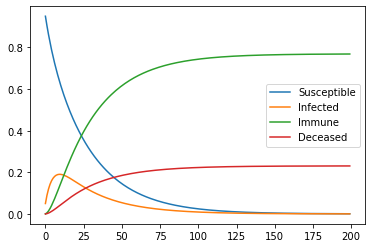

In [4]:
n = 200
x = x0
x_all = np.matrix(np.zeros((4,n)))
for i in range(n):
    x = A*x
    x_all[:,i] = x
labels = ["Susceptible", "Infected", "Immune", "Deceased"]
for i in range(4):
    plt.plot(x_all[i].T, label=labels[i])
plt.legend()

&#9989;  **<font color=red>Do this:</font>** Find the eigenvectors for matrix $A$ above. How do they relate to the final answer?

In [5]:
#Put your code to the above question here
eigval, eigvec = np.linalg.eig(A)
print(eigval)
print(eigvec)

[1.         1.         0.96483315 0.81516685]
[[ 0.          0.          0.65239417 -0.25009572]
 [ 0.          0.          0.24192648  0.84302984]
 [ 1.          0.         -0.68793896 -0.45610317]
 [ 0.          1.         -0.20638169 -0.13683095]]


Since we have two eigenvalue with value = 1. Therefore, the steady state would be in span of this two vector.

---
<a name="Epi_continuous"></a>
## 1. Epidemic Dynamics - Continuous Model

Instead of using the discrete markov model, we can also use a continuous model with ordinary differential equations. 

For example, we have that 

$$\dot{x}_1 = {dx_1(t)\over dt} = -0.05x_1(t)+ 0.04 x_2(t)$$
It means that the changes in the susceptible group depends on susceptible and infected individuals. It increases because of the recovered people from infected ones and it decreases because of the infection. 

Similarly, we have the equations for all three groups.
$$\dot{x}_2 = {dx_2(t)\over dt} = 0.05x_1(t)-0.17 x_2(t) \\ 
\dot{x}_3 = {dx_3(t)\over dt}= 0.1 x_2(t) \\
\dot{x}_4 = {dx_4(t)\over dt} = 0.03 x_2(t)$$


&#9989;  **<font color=red>Do this:</font>** We can write it as system of ODEs as 
$$\dot{x}(t) = Bx(t)$$
Write down the matrix $B$ in `numpy.matrix`

In [6]:
# Put your answer to the above question here.
B = np.matrix([[-0.05,0.04,0,0],[0.05,-0.17,0,0],[0,0.1,0,0],[0,0.03,0,0]])
sym.Matrix(B)

⎡-0.05  0.04   0.0  0.0⎤
⎢                      ⎥
⎢0.05   -0.17  0.0  0.0⎥
⎢                      ⎥
⎢ 0.0    0.1   0.0  0.0⎥
⎢                      ⎥
⎣ 0.0   0.03   0.0  0.0⎦

&#9989;  **<font color=red>Do this:</font>** Plot $x_1$ through $x_4$ as functions of time, where $t$ ranges from 0 to 200 days. Then compare the graph of your solution with the discrete version. **Hint:** Look back at section 3 of your pre-class assignment on ordinary differential equations. 

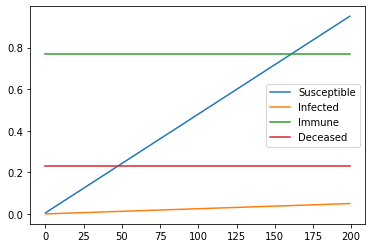

In [7]:
x0 = np.matrix([[1],[0],[0],[0]])
n = 200
x_all = np.matrix(np.zeros((4,n)))
labels = ["Susceptible", "Infected", "Immune", "Deceased"]
### Your code starts here ###
for i in range(n):  
        x_dot = A*x0         # First we transform x into the derrivative
        x = x + x_dot*0.005    # Then we estimate x based on the previous value and a small increment of time.
        x_all[:,i] = x[:,0]
### Your code ends here ###
for i in range(4):
    plt.plot(x_all[i].T, label=labels[i])
plt.legend()

---
<a name="Population"></a>
## 3. Population Dynamics 

In this section, we consider the distribution of a population at different ages. Let $x(t)$ be a 100-vector with $x_i(t)$ denoting the number of people with age $i-1$. 

The birth rate is given in the vector $b$, where $b_i$ is the average number of births per person with age $i-1$. $b_i=0$ for $i<13$ and $i>50$.  

The death rate is given by the vector $d$, where $d_i$ is the portion of those aged $i-1$ who dies this year. 

Then we can model the population using dynamical systems. 
We consider the 0-year old first. It includes all newborn from all ages, so we have
$$x_1(t+1) = b^\top x(t)$$
Then we consider all other ages for $i>1$. 
$$x_i(t+1) = (1-d_{i-1})x_{i-1}(t)$$


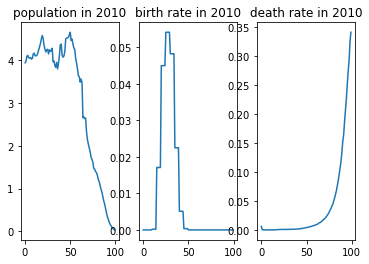

In [8]:
population = np.array([
       3.94415,       3.97807,       4.09693,       4.11904,       4.06317,       4.05686,       4.06638,       4.03058,
       4.04649,       4.14835,       4.17254,       4.11442,       4.10624,       4.11801,       4.16598,       4.24282,
       4.31614,       4.39529,       4.50085,       4.58523,       4.51913,       4.35429,       4.26464,       4.19857,
       4.24936,       4.26235,       4.15231,       4.24887,       4.21525,       4.22308,       4.28567,       3.97022,
       3.98685,       3.88015,       3.83922,       3.95643,       3.80209,       3.93445,       4.12188,       4.36480,
       4.38327,       4.11498,       4.07610,       4.10511,       4.21150,       4.50887,       4.51976,       4.53526,
       4.53880,       4.60590,       4.66029,       4.46463,       4.50085,       4.38035,       4.29200,       4.25471,
       4.03751,       3.93639,       3.79493,       3.64127,       3.62113,       3.49260,       3.56318,       3.48388,
       2.65713,       2.68076,       2.63914,       2.64936,       2.32367,       2.14232,       2.04312,       1.94932,
       1.86427,       1.73696,       1.68449,       1.62008,       1.47107,       1.45533,       1.40012,       1.37119,
       1.30851,       1.21287,       1.16142,       1.07481,       0.98572,       0.91472,       0.81421,       0.71291,
       0.64062,       0.53800,       0.43556,       0.34499,       0.28139,       0.21698,       0.16944,       0.12972,
       0.09522,       0.06814,       0.04590,       0.03227])
d = np.array([
       0.00623,       0.00044,       0.00027,       0.00020,       0.00016,       0.00012,       0.00011,       0.00011,
       0.00012,       0.00011,       0.00010,       0.00013,       0.00013,       0.00015,       0.00020,       0.00025,
       0.00037,       0.00047,       0.00064,       0.00071,       0.00076,       0.00087,       0.00087,       0.00088,
       0.00094,       0.00092,       0.00095,       0.00093,       0.00099,       0.00101,       0.00103,       0.00109,
       0.00110,       0.00114,       0.00115,       0.00120,       0.00131,       0.00137,       0.00146,       0.00156,
       0.00162,       0.00185,       0.00201,       0.00216,       0.00243,       0.00258,       0.00298,       0.00325,
       0.00351,       0.00387,       0.00413,       0.00454,       0.00494,       0.00533,       0.00571,       0.00602,
       0.00670,       0.00710,       0.00769,       0.00828,       0.00860,       0.00932,       0.00998,       0.01101,
       0.01250,       0.01282,       0.01404,       0.01515,       0.01687,       0.01830,       0.01967,       0.02133,
       0.02347,       0.02562,       0.02800,       0.03083,       0.03441,       0.03711,       0.04126,       0.04448,
       0.04964,       0.05539,       0.06149,       0.06803,       0.07673,       0.08561,       0.09540,       0.10636,
       0.11802,       0.13385,       0.15250,       0.16491,       0.18738,       0.20757,       0.22688,       0.25196,
       0.27422,       0.29239,       0.32560,       0.34157])
b = np.array([
       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,
       0.00000,       0.00000,       0.00020,       0.00020,       0.00020,       0.00020,       0.00020,       0.01710,
       0.01710,       0.01710,       0.01710,       0.01710,       0.04500,       0.04500,       0.04500,       0.04500,
       0.04500,       0.05415,       0.05415,       0.05415,       0.05415,       0.05415,       0.04825,       0.04825,
       0.04825,       0.04825,       0.04825,       0.02250,       0.02250,       0.02250,       0.02250,       0.02250,
       0.00510,       0.00510,       0.00510,       0.00510,       0.00510,       0.00035,       0.00035,       0.00035,
       0.00035,       0.00035,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,
       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,
       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,
       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,
       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,
       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,       0.00000,
       0.00000,       0.00000,       0.00000,       0.00000])

plt.subplot(1,3,1)
plt.plot(population)
plt.title('population in 2010')
plt.subplot(1,3,2)
plt.plot(b)
plt.title('birth rate in 2010')
plt.subplot(1,3,3)
plt.plot(d)
plt.title('death rate in 2010')

plt.show()

&#9989;  **<font color=red>Do this:</font>** Find the $100\times 100$ matrix `A2` such that 
$$x(t+1)=Ax(t)$$

In [9]:
A2 = np.matrix(np.zeros((100,100)))
A2[0,:] = b
for i in range(99):
    A2[i+1,i] = 1 - d[i]
print(A2)

[[0.      0.      0.      ... 0.      0.      0.     ]
 [0.99377 0.      0.      ... 0.      0.      0.     ]
 [0.      0.99956 0.      ... 0.      0.      0.     ]
 ...
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.70761 0.      0.     ]
 [0.      0.      0.      ... 0.      0.6744  0.     ]]


&#9989;  **<font color=red>Do this:</font>** Plot the population distribution at year 2020.

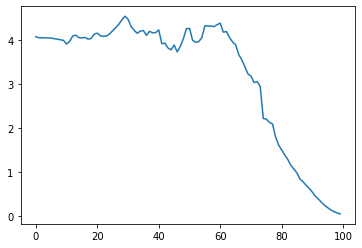

In [10]:
# Put your answer to the above question here.
plt.plot(A2**10*np.matrix(population).T)

-----

Written by Dr. Dirk Colbry, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.